In [1]:
import numpy as np
import pandas as pd
import cvxopt
from cvxopt import matrix, solvers
import os
import cv2

In [2]:
class_3_path = './svm/train/3/'
image_3_list = []
for filename in os.listdir(class_3_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img = cv2.imread(os.path.join(class_3_path,filename))
        if img is not None:
            resized_img = cv2.resize(img, (16, 16))
            normalized_img = resized_img / 255.0
            flattened_img = normalized_img.flatten()
            image_3_list.append(flattened_img)

class_4_path = './svm/train/4/'
image_4_list = []
for filename in os.listdir(class_4_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img = cv2.imread(os.path.join(class_4_path,filename))
        if img is not None:
            resized_img = cv2.resize(img, (16, 16))
            normalized_img = resized_img / 255.0
            flattened_img = normalized_img.flatten()
            image_4_list.append(flattened_img)

In [3]:
m = len(image_3_list) + len(image_4_list)
n = image_4_list[0].shape[0]
m, n

(4760, 768)

In [4]:
X = np.array(image_3_list + image_4_list)
Y = np.array([-1] * len(image_3_list) + [1] * len(image_4_list))

In [5]:
XY = Y.reshape(-1, 1) * X
H = np.dot(XY, XY.T)

In [6]:
P = matrix(H, tc='d')
q = matrix(-np.ones((m, 1)), tc='d')
G = matrix(np.vstack((np.eye(m)*-1,np.eye(m))), tc='d')
h = matrix(np.hstack((np.zeros(m), np.ones(m) * 1)), tc='d')
A = matrix(Y.reshape(1, -1), tc='d')
b = matrix(np.zeros(1), tc='d')

In [7]:
Y.reshape(1, -1).shape

(1, 4760)

In [8]:
sol = solvers.qp(P, q, G, h, A, b)

     pcost       dcost       gap    pres   dres
 0: -3.0947e+03 -1.5822e+04  9e+04  4e+00  7e-11
 1: -2.1190e+03 -1.2160e+04  2e+04  6e-01  8e-11
 2: -1.9827e+03 -4.6356e+03  3e+03  2e-12  6e-11
 3: -2.3230e+03 -3.0834e+03  8e+02  6e-13  6e-11
 4: -2.4476e+03 -2.8586e+03  4e+02  1e-12  7e-11
 5: -2.5326e+03 -2.6990e+03  2e+02  8e-13  7e-11
 6: -2.5658e+03 -2.6400e+03  7e+01  3e-12  7e-11
 7: -2.5830e+03 -2.6112e+03  3e+01  4e-12  7e-11
 8: -2.5903e+03 -2.5992e+03  9e+00  3e-12  7e-11
 9: -2.5932e+03 -2.5949e+03  2e+00  2e-12  8e-11
10: -2.5938e+03 -2.5941e+03  4e-01  8e-13  8e-11
11: -2.5939e+03 -2.5940e+03  4e-02  4e-13  8e-11
12: -2.5939e+03 -2.5939e+03  2e-03  2e-12  8e-11
Optimal solution found.


In [9]:
solution = np.array(sol['x'])

In [10]:
w = np.sum(solution * Y.reshape(-1, 1) * X, axis=0)
b = np.sum(solution * Y.reshape(-1, 1) * X @ X[0, :].reshape(-1, 1)) - Y[0]

In [11]:
def predict(x, w, b):
    val = w.T @ x + b
    return 1 if val >= 0 else -1

In [ ]:
incorrect = 0
for img in image_3_list:
    prediction = predict(img, w, b)
    if(prediction != -1):
        incorrect += 1
for img in image_4_list:
    prediction = predict(img, w, b)
    if(prediction != 1):
        incorrect += 1
print(f"Correct: {m - incorrect}\nIncorrect: {incorrect}\nAccuracy: {(m - incorrect) / m}")

Correct: 3626
Incorrect: 1134
Accuracy: 0.7617647058823529


In [13]:
validation_3_path = './svm/val/3/'
validation_image_3_list = []
for filename in os.listdir(validation_3_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img = cv2.imread(os.path.join(validation_3_path,filename))
        if img is not None:
            resized_img = cv2.resize(img, (16, 16))
            normalized_img = resized_img / 255.0
            flattened_img = normalized_img.flatten()
            validation_image_3_list.append(flattened_img)
validation_4_path = './svm/val/4/'
validation_image_4_list = []
for filename in os.listdir(validation_4_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img = cv2.imread(os.path.join(validation_4_path,filename))
        if img is not None:
            resized_img = cv2.resize(img, (16, 16))
            normalized_img = resized_img / 255.0
            flattened_img = normalized_img.flatten()
            validation_image_4_list.append(flattened_img)

In [14]:
correct = 0
incorrect = 0
for img in validation_image_3_list:
    prediction = predict(img, w, b)
    if(prediction == -1):
        correct += 1
    else:
        incorrect += 1
for img in validation_image_4_list:
    prediction = predict(img, w, b)
    if(prediction == 1):
        correct += 1
    else:
        incorrect += 1
print(f"Correct: {correct} \nIncorrect: {incorrect} \nAccuracy: {correct / (correct + incorrect)}")

NameError: name 'validation_image_3_list' is not defined

In [ ]:
num_sv = len(solution[solution > 1e-5])
num_sv

2950

In [17]:
num_sv/len(solution)

0.6197478991596639

In [19]:
sorted_indices = np.argsort(solution, axis=0)[::-1]
top_6 = sorted_indices[:6]

In [36]:
top_6_support_vectors = []
image_3_names = os.listdir(class_3_path)
image_4_names = os.listdir(class_4_path)
image_3_sv = []
image_4_sv = []
for i in top_6:
    if i[0] < len(image_3_names):
        top_6_support_vectors.append(image_3_names[i[0]])
        image_3_sv.append(image_3_names[i[0]])
    else:
        top_6_support_vectors.append(image_4_names[i[0] - len(image_3_names)])
        image_4_sv.append(image_4_names[i[0] - len(image_3_names)])

In [37]:
top_6_support_vectors

['1828.jpg', '6560.jpg', '6601.jpg', '8868.jpg', '11940.jpg', '5720.jpg']

In [49]:
from PIL import Image
output_dir = './part_a_sv/'
i = 0
for img_name in image_3_sv:
    img = cv2.imread(os.path.join(class_3_path, img_name))
    if img is not None:
        resized_img = cv2.resize(img, (16, 16))
        pillow_image_resized = Image.fromarray(np.uint8(resized_img))
        pillow_image_original = Image.fromarray(np.uint8(img))
        filename_resized = f"image_{i}_sv_resized.jpg"
        filename_original = f"image_{i}_sv_original.jpg"
        pillow_image_resized.save(os.path.join(output_dir, filename_resized))
        pillow_image_original.save(os.path.join(output_dir, filename_original))
    i += 1
for img_name in image_4_sv:
    img = cv2.imread(os.path.join(class_4_path, img_name))
    if img is not None:
        resized_img = cv2.resize(img, (16, 16))
        pillow_image_resized = Image.fromarray(np.uint8(resized_img))
        pillow_image_original = Image.fromarray(np.uint8(img))
        filename_resized = f"image_{i}_sv_resized.jpg"
        filename_original = f"image_{i}_sv_original.jpg"
        pillow_image_resized.save(os.path.join(output_dir, filename_resized))
        pillow_image_original.save(os.path.join(output_dir, filename_original))
    i += 1

C:\Users\Garv\AppData\Local\Temp\ipykernel_11996\4088174303.py:12: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  fig.canvas.tostring_rgb())


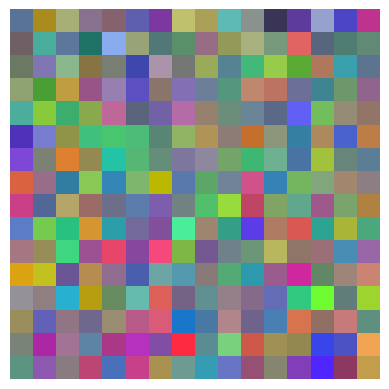

In [56]:
import matplotlib.pyplot as plt
w_img = w.reshape(16, 16, 3)
min_w = np.min(w_img)
max_w = np.max(w_img)
cmap = 'viridis'
normalized_w = (w_img - min_w) / (max_w - min_w)
fig, ax = plt.subplots()
im = ax.imshow(normalized_w, cmap=cmap)
ax.axis('off')
fig.canvas.draw()
pil_image = Image.frombytes('RGB', fig.canvas.get_width_height(),
                            fig.canvas.tostring_rgb())
pil_image.save('output_image.jpg')

In [12]:
import sklearn.svm as svm
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, Y)

SVC(kernel='linear')

In [13]:
np.linalg.norm(clf.coef_ - w)

0.02361133917194848

In [14]:
clf.intercept_ - b

array([-0.55158553])

In [15]:
support_vector_indices = clf.support_
support_vectors = clf.support_vectors_
my_indices = []
for i in range(len(solution)):
    if(solution[i] > 1e-5):
        my_indices.append(i)


In [16]:
my_indices_set = set(my_indices)
support_vector_indices_set = set(support_vector_indices)

# Find the common elements (matching indices) using set intersection
matching_indices = my_indices_set.intersection(support_vector_indices_set)

# Get the count of matching indices
num_matching_indices = len(matching_indices)

In [17]:
num_matching_indices

2904